In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
paths = {
    2015: "../data/2015.csv",
    2016: "../data/2016.csv",
    2017: "../data/2017.csv",
    2018: "../data/2018.csv",
    2019: "../data/2019.csv"
}

In [45]:
rename_old = {
    "Country": "Country",
    "Happiness Score": "Score",              # 2015–2016 
    "Happiness.Score": "Score",              # 2017

    "Economy (GDP per Capita)": "GDP per capita",      # 2015–2016
    "Economy..GDP.per.Capita.": "GDP per capita",       # 2017

    "Family": "Social support",              # all years 2015–2017

    "Health (Life Expectancy)": "Healthy life expectancy",   # 2015–2016
    "Health..Life.Expectancy.": "Healthy life expectancy",    # 2017

    "Freedom": "Freedom",

    "Trust (Government Corruption)": "Corruption",   # 2015–2016
    "Trust..Government.Corruption.": "Corruption",   # 2017

    "Generosity": "Generosity"
}

In [46]:
rename_new = {
    "Country or region": "Country",
    "Score": "Score",
    "GDP per capita": "GDP per capita",
    "Social support": "Social support",
    "Healthy life expectancy": "Healthy life expectancy",
    "Freedom to make life choices": "Freedom",
    "Perceptions of corruption": "Corruption",
    "Generosity": "Generosity"
}

In [47]:
keep_cols = [
    "Year", "Country", "Score", "GDP per capita", "Social support",
    "Healthy life expectancy", "Freedom", "Generosity", "Corruption"
]

In [48]:
dfs = []

for year, path in paths.items():
    df = pd.read_csv(path)
    df["Year"] = year
    
    if year <= 2017:
        df = df.rename(columns=rename_old)
    else:
        df = df.rename(columns=rename_new)
    
    available = [c for c in keep_cols if c in df.columns]
    df = df[available]
    
    dfs.append(df)


In [49]:
merged = pd.concat(dfs, ignore_index=True)
merged.head()


,Year,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption
0,2015,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2015,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,2015,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,2015,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,2015,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


In [50]:
merged.to_csv("../data/happiness_2015_to_2019_clean.csv", index=False)

In [51]:
df = pd.read_csv("../data/happiness_2015_to_2019_clean.csv")

num_cols = df.select_dtypes(include="number").columns
df[num_cols] = df[num_cols].round(3)

df.to_csv("../data/happiness_2015_to_2019_clean_rounded.csv", index=False)

df.head()

,Year,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Corruption
0,2015,Switzerland,7.587,1.397,1.350,0.941,0.666,0.297,0.420
1,2015,Iceland,7.561,1.302,1.402,0.948,0.629,0.436,0.141
2,2015,Denmark,7.527,1.325,1.361,0.875,0.649,0.341,0.484
3,2015,Norway,7.522,1.459,1.331,0.885,0.670,0.347,0.365
4,2015,Canada,7.427,1.326,1.323,0.906,0.633,0.458,0.330


In [52]:
df = pd.read_csv("../data/happiness_2015_to_2019_clean_rounded.csv")

   Year     Score
0  2015  5.375734
1  2016  5.382185
2  2017  5.354019
3  2018  5.375917
4  2019  5.407096


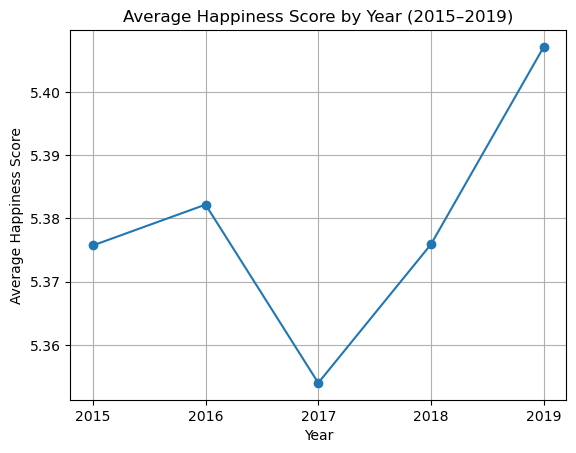

In [53]:
p1 = df.groupby("Year", as_index=False)["Score"].mean()
print(p1)

plt.figure()
plt.plot(p1["Year"], p1["Score"], marker="o")
plt.title("Average Happiness Score by Year (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)

plt.xticks(p1["Year"], p1["Year"].astype(int))

plt.savefig("../images/p1_earnest.png", dpi=300, bbox_inches="tight")
plt.show()

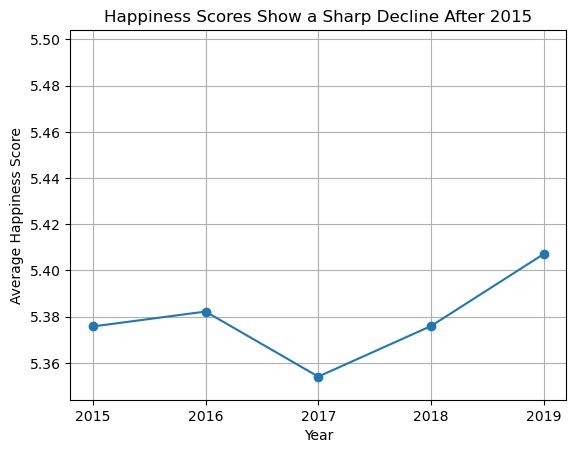

In [54]:
plt.figure()
plt.plot(p1["Year"], p1["Score"], marker="o")
plt.title("Happiness Scores Show a Sharp Decline After 2015")
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.grid(True)

plt.xticks(p1["Year"], p1["Year"].astype(int))

plt.ylim(p1["Score"].min() - 0.01, p1["Score"].min() + 0.15)

plt.savefig("../images/p2_deceptive.png", dpi=300, bbox_inches="tight")
plt.show()

# ASSIGNMENT 2 — Deceptive Visualization  
**Student:** Sanju Saji 

---

## Dataset Description  
The dataset used in this assignment is the **World Happiness Report (2015–2019)**.  
It contains country-level indicators such as happiness score, GDP per capita, social support, freedom, and corruption.

All yearly files (2015–2019) were cleaned, standardized, and merged into a single dataset for consistent comparison.

**Data Source:** https://www.kaggle.com/datasets/unsdsn/world-happiness

---

## Data Questions  

### **Earnest Question (Honest Visualization)**  
**How has the average global happiness score changed from 2015 to 2019?**

### **Deceptive Question (Misleading Visualization)**  
**Did global happiness dramatically decrease between 2015 and 2019?**

---

## Earnest Visualization  
### *“Average Happiness Score by Year (2015–2019)”*  
![Earnest Visualization](../images/p1_earnest.png)

**Rationale:**  
This visualization accurately shows how the mean happiness score changed over time.  
- The y-axis uses a natural scale and is not shortened.  
- Aggregation is transparent (mean score per year).  
- Colors, labels, and titles are neutral.  
The chart presents a realistic view of small natural variations, helping the viewer correctly interpret the data.

---

## Deceptive Visualization  
### *“Happiness Scores Show a Sharp Decline After 2015”*  
![Deceptive Visualization](../images/p2_deceptive.png)

**Rationale:**  
This chart uses the same data but manipulates perception:  
- The y-axis is tightly zoomed to exaggerate small differences, making the trend look dramatic.  
- The title frames the data negatively.  
- All other design elements look normal, which hides the manipulation.  
Although factually correct, the visualization is contextually misleading.

---

## Reflection  
This visualization demonstrates how small design choices—especially axis scaling and framing—can drastically change how viewers interpret the same dataset.

---

